<IPython.core.display.Javascript object>


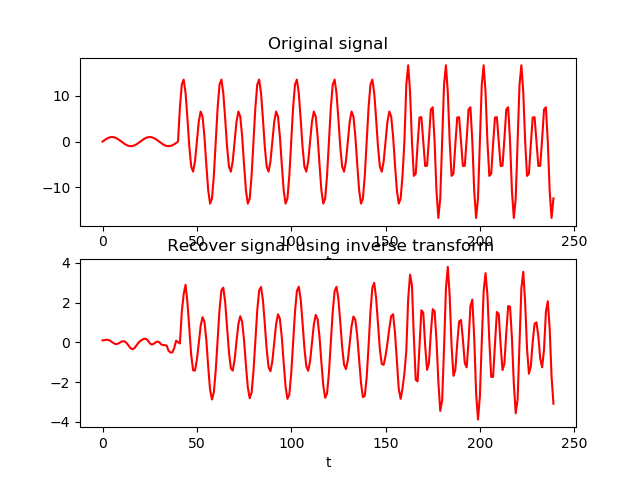

working, finding transform, count 20
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
transform found
normalize
finding inverse transform
count to 10
1
2
3
4
5
6
7
8
9
10


<IPython.core.display.Javascript object>


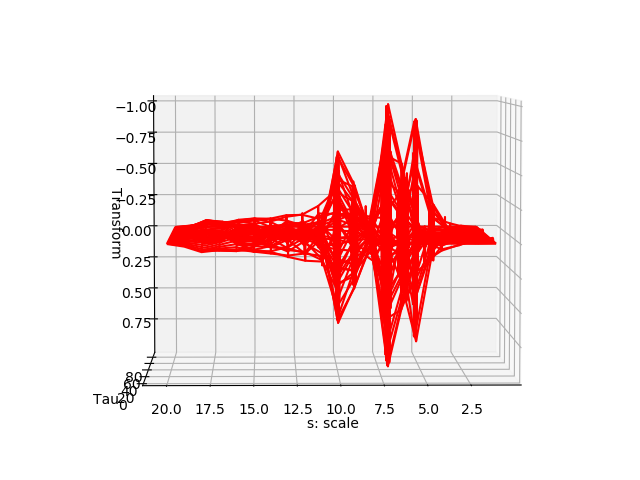

In [2]:
#capitulo 13 libro paez.
#from IPython.display import IFrame
from numpy import *
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D  
%matplotlib notebook

iT =  0.0
fT =  12.0 
W = fT - iT
N =  240
h =  W/N 
noPtsSig =  N
noS =  20
noTau =  90
iTau =  0.
iS =  0.1
tau =  iTau
s =  iS 
# Need *very* small s steps for high frequency if s small;
dTau =  W/noTau
dS =  (W/iS)**(1./noS)
maxY =  0.001
sig =  zeros((noPtsSig), float)      # Signal
xx=[]                                # To plot original signal
signl=[]

def signal(noPtsSig,y,xx,signl):             # Signal function
    t = 0.0
    hs = W/noPtsSig
    t1 = W/6.
    t2 = 4.*W/6.
    for i in range(0, noPtsSig):  
        if  t >= iT  and t <=  t1:  
            y[i] =  sin(2*pi*t)
            signl=signl+[y[i]]
            xx=xx+[i]
        elif t >= t1 and t <=  t2: 
            y[i] = 5.*sin(2*pi*t) + 10.*sin(4*pi*t);
            signl=signl+[y[i]]
            xx=xx+[i]
        elif t >= t2 and t <=  fT: 
            y[i] = 2.5*sin(2*pi*t) + 6.*sin(4*pi*t) + 10.*sin(6*pi*t)
            signl=signl+[y[i]]
            xx=xx+[i]
        else: 
            print("In signal(...) : t out of range.")
            sys.exit(1)
          
        t += hs  
    return xx,signl
xx,signl=signal(noPtsSig, sig,xx,signl)      # Form signal
fig1=plt.figure()                            # Plot original signal
ax1=fig1.add_subplot(2,1,1)  
ax1.plot(xx,signl,'r')
plt.xlabel('t')
plt.title('Original signal')

Yn =  zeros( (noS+1, noTau+1), float)        # Transform    
def morlet(t, s, tau):                                         # Mother see eq. 11.14
    T =  (t - tau)/s
    return sin(8*T) * exp( - T*T/2. )

def transform(s, tau, sig):   # see eq. 11.16, finds wavelet transform
    integral = 0.
    t = iT;                                                                # for time
    for i in range(0, len(sig) ):
        t += h
        integral += sig[i]*morlet(t, s, tau)*h
    return integral / sqrt(s)
       
def invTransform(t, Yn):                            # after tranform computes inverse
    s = iS                                                                # transform
    tau = iTau                                     # inverse transform not normalized
    recSig_t = 0                 
    for i in range (0, noS):
        s *= dS                                             # to scale the graph is s
        tau = iTau                                                          # for tau
        for j in range (0, noTau):
            tau += dTau                 
            recSig_t += dTau*dS *(s**( - 1.5) )* Yn[i, j] * morlet(t, s, tau)
    return recSig_t

print("working, finding transform, count 20")
for i in range( 0, noS):
    s *= dS             # was with *                                        # Scaling
    tau = iT
    print(i)
    for j in range(0, noTau):
        tau += dTau                                                    # Translation
        Yn[i, j] = transform(s, tau, sig)
print("transform found")  
for i in range( 0, noS):
    for j in range( 0, noTau):
        if Yn[i, j] > maxY or Yn[i, j] < - 1 *maxY :
            maxY = abs( Yn[i, j] )                                       # Find max Y       
tau =  iT
s =  iS
print("normalize")      
for i in range( 0, noS):
    s *= dS                             
    for j in range( 0, noTau):
        tau +=   dTau                                                    # Transform
        Yn[i, j] = Yn[i, j]/maxY
    tau = iT
print("finding inverse transform")                                   # Find inverse TF
recSigData =  "recSig.dat"                   
recSig =  zeros(len(sig) )                                          # Same resolution
t =  0.0;
print("count to 10")
kco = 0;            j = 0;              Yinv =  Yn             
for rs in range(0, len(recSig) ):            # with inverse transform
    recSig[rs] = invTransform(t, Yinv)       # find the original signal
    #invtr.x[rs] = 2*rs - N                   # here plots the inverse
    #invtr.y[rs] = 10.*recSig[rs]             # transform
    t += h 
    if kco %24 == 0:
        j += 1
        print(j)                             # just to see how long it takes
    kco += 1  
ax1=fig1.add_subplot(2,1,2)  
ax1.plot(xx,recSig,'r')
plt.xlabel('t')
plt.title(' Recover signal using inverse transform')   
x = list(range(1, noS + 1))                  # to plot  in x axis
y = list(range(1, noTau + 1))                                                        # in y
X,Y = plt.meshgrid(x, y)                       # grid for s and tau

def functz(Yn):                              # Function returns transform
    z = Yn[X, Y]    
    return z
                
Z = functz(Yn)                               # function called
fig = plt.figure()                             # creates figure
ax = Axes3D(fig)                             # plots axis for figure
ax.plot_wireframe(X, Y, Z, color = 'r')      # surface of wireframe in red
ax.set_xlabel('s: scale')                    # label axes
ax.set_ylabel('Tau')
ax.set_zlabel('Transform')

plt.show()

